# Making models with Bagpipes

This example will show you how to make and plot a model galaxy spectrum with Bagpipes. You'll need to understand the syntax used here before moving on to fitting observational data. For further information see the [model galaxy](http://bagpipes.readthedocs.io/en/latest/model_galaxies.html) page of the documentation.


## Defining filter curves

First things first, if you want to generate model photometry you'll need to tell Bagpipes where to find the filter curves. To do this construct a list containing paths from the current directory to the locations the filter are stored. 

The filter curve files should start with a column of wavelengths in Angstroms, followed by a column of fractional transmission values.

In [66]:
import bagpipes as pipes
import numpy as np

uvista_filt_list = ["uvista/CFHT_u.txt",
                    "uvista/CFHT_g.txt",
                    "uvista/CFHT_r.txt",
                    "uvista/CFHT_i+i2.txt",
                    "uvista/CFHT_z.txt",
                    "uvista/subaru_z",
                    "uvista/VISTA_Y.txt",
                    "uvista/VISTA_J.txt",
                    "uvista/VISTA_H.txt",
                    "uvista/VISTA_Ks.txt",
                    "uvista/IRAC1",
                    "uvista/IRAC2"]

## The model components dictionary

The instructions passed to Bagpipes about what kind of model to make are passed to the code via the model components (model_comp) dictionary. The star-formation history is defined by an unlimited number of components such as bursts, constant periods of star-formation and tau-models which are passed as dictionaries within model components. You can also add dust and nebular component dictionaries, and global properties like redshift. 

In [67]:
exp = {}                          # Tau-model star-formation history component
exp["age"] = 3.                  # Gyr
exp["tau"] = 0.75                 # Gyr
exp["massformed"] = 9.           # log_10(M*/M_solar)
exp["metallicity"] = 0.5           # Z/Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # mag

model_comp = {}                   # The model components dictionary
model_comp["redshift"] = 1.0      # Observed redshift  
model_comp["exponential"] = exp   
model_comp["dust"] = dust

## Making the model

We're now ready to make our model galaxy. The command is:

In [68]:
model = pipes.model_galaxy(model_comp, filt_list=uvista_filt_list)

We can generate a quick plot to see what the model spectrum and star-formation history look like with:

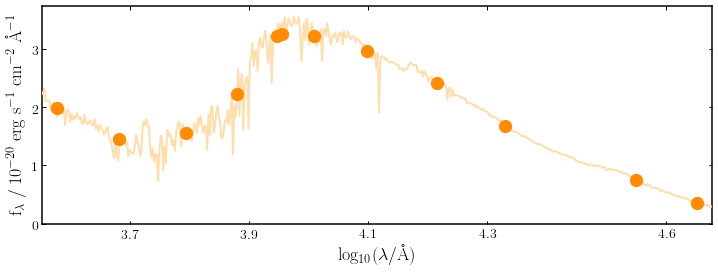

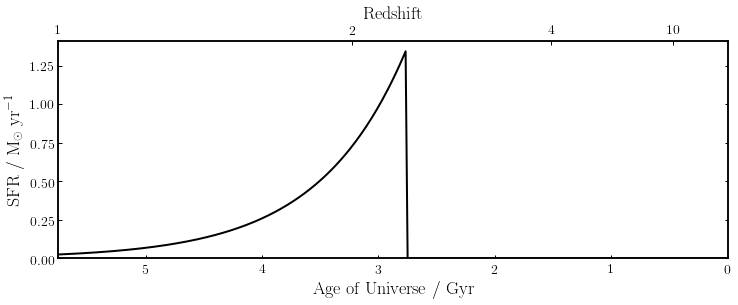

In [69]:
fig = model.plot()
sfh = model.sfh.plot()

## Model spectroscopy

We can generate an output spectroscopic observation by passing an array of wavelengths in Angstroms to model_galaxy as the spec_wavs keyword argument:

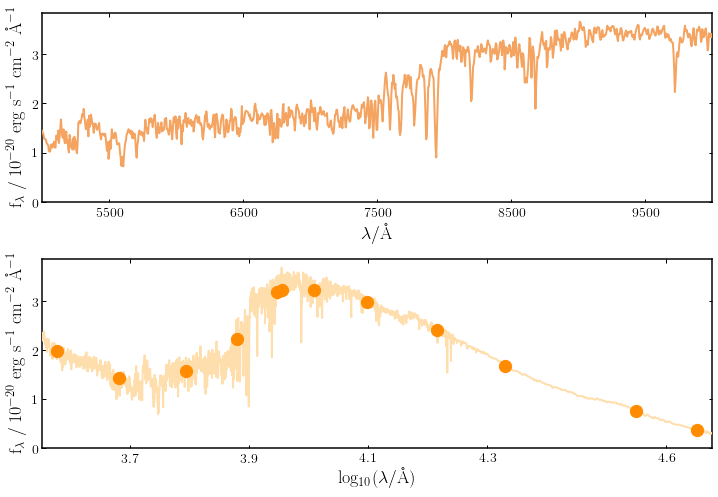

In [70]:
model = pipes.model_galaxy(model_comp, filt_list=uvista_filt_list, spec_wavs=np.arange(5000., 10000., 5.))

fig = model.plot()

## Updating model parameters

The parameters of a model can be updated and the spectrum changed. This  is computationally much faster than making a new model, and is achieved using the update method. We can change numerical values and pass the updated model_comp to the update method to change the model spectrum.

The update method does not support adding or removing components, e.g. adding nebular emission, or changing non-numerical values e.g. the type of dust.

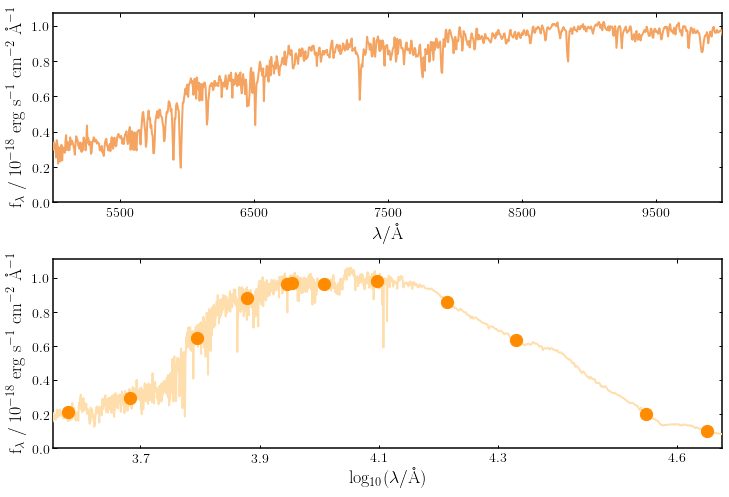

In [71]:
exp["massformed"] = 10.           
exp["metallicity"] = 1.0
dust["Av"] = 1.0
model_comp["redshift"] = 0.5

model.update(model_comp)
fig = model.plot()

## Adding complexity to the model - nebular emission

Now we can make the model a little more interesting. Let's add nebular emission and velocity dispersion.

Note that because we're adding a new component we need to re-generate a new model rather than using the update method.

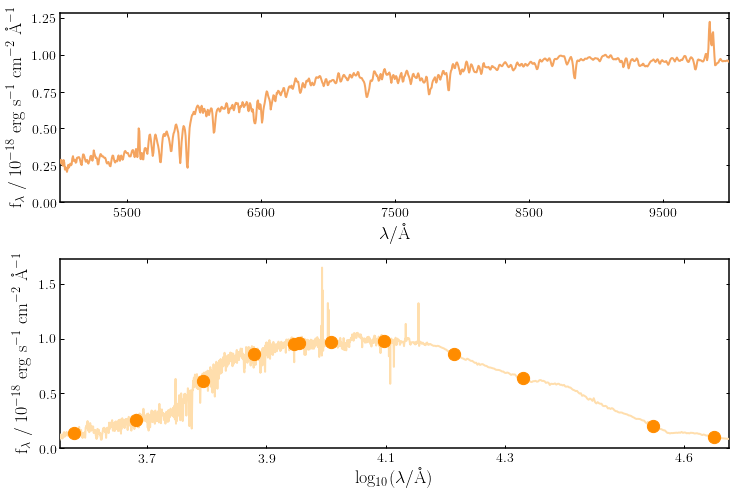

In [72]:
nebular = {}                      # Nebular emission component
nebular["logU"] = -3.             # log_10(ionization parameter)

dust["eta"] = 3.                  # Extra dust for young stars: multiplies Av

model_comp["t_bc"] = 0.01         # Lifetime of birth clouds (Gyr)
model_comp["veldisp"] = 200.      # km/s
model_comp["nebular"] = nebular

model = pipes.model_galaxy(model_comp, filt_list=uvista_filt_list, spec_wavs=np.arange(5000., 10000., 5.))

fig = model.plot()

## Adding complexity to the model - star-formation histories

Let's try out a more interesting star-formation history. We'll try a double-power-law and some bursts. Multiple components of the same type can be distinguished by numbering:

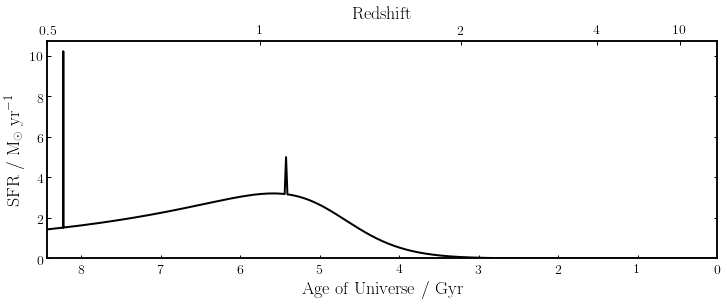

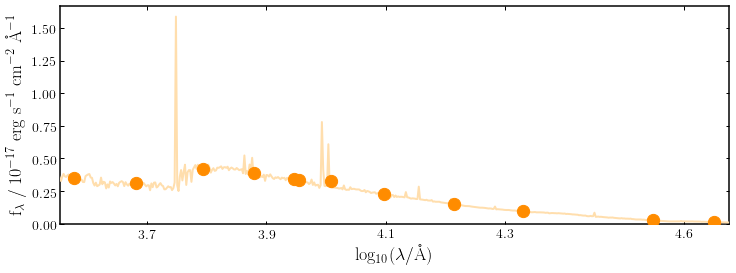

In [79]:
dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

dblplaw = {}
dblplaw["tau"] = 5.            # Time of peak (Gyr)
dblplaw["alpha"] = 2.5         # falling slope power-law index
dblplaw["beta"] = 10.          # rising slope power-law index
dblplaw["massformed"] = 10.
dblplaw["metallicity"] = 0.5

burst1 = {}
burst1["age"] = 0.2
burst1["massformed"] = 7.
burst1["metallicity"] = 1.

burst2 = {}
burst2["age"] = 3.
burst2["massformed"] = 7.5
burst2["metallicity"] = 0.2

model_comp = {}                   
model_comp["redshift"] = 0.5
model_comp["t_bc"] = 0.01         
model_comp["veldisp"] = 200. 
model_comp["burst1"] = burst1
model_comp["burst2"] = burst2
model_comp["dblplaw"] = dblplaw
model_comp["dust"] = dust
model_comp["nebular"] = nebular

model = pipes.model_galaxy(model_comp, filt_list=uvista_filt_list)

sfh = model.sfh.plot()
fig = model.plot()

Finally, let's try out a custom star-formation history. You can pass a numpy array containing a column of ages in years and a column of star-formation rates in Solar masses per year:

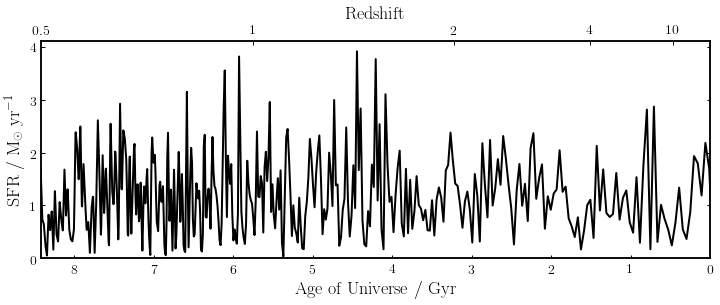

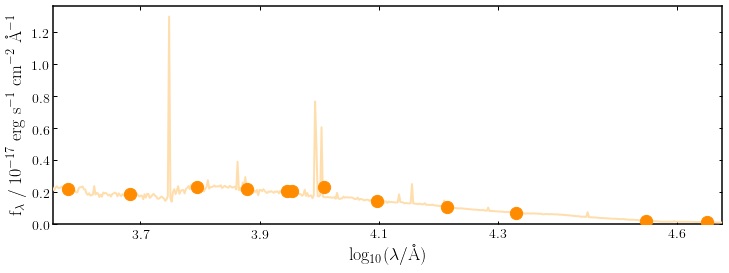

In [85]:
dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

sfh = np.zeros((500, 2))
sfh[:, 0] = np.arange(0., 10., 0.02)*10**9
sfh[:, 1] = np.abs(np.random.randn(500))

custom = {}
custom["history"] = sfh
custom["massformed"] = 10.
custom["metallicity"] = 1.

model_comp = {}                   
model_comp["redshift"] = 0.5
model_comp["t_bc"] = 0.01         
model_comp["veldisp"] = 200. 
model_comp["custom"] = custom
model_comp["dust"] = dust
model_comp["nebular"] = nebular

model = pipes.model_galaxy(model_comp, filt_list=uvista_filt_list)

sfh = model.sfh.plot()
fig = model.plot()